In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

In [3]:
pre_data = pd.read_csv('Income-Prediction\Preprocessed_dataset.csv')
pre_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,5,77516.0,9,12,4,0,1,4,1,2174,0,40,38,0
1,50.0,4,83311.0,9,12,2,3,0,4,1,0,0,13,38,0
2,38.0,2,215646.0,11,8,0,5,1,4,1,0,0,40,38,0
3,53.0,2,234721.0,1,6,2,5,0,2,1,0,0,40,38,0
4,28.0,2,338409.0,9,12,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45162,33.0,2,245211.0,9,12,4,9,3,4,1,0,0,40,38,0
45163,39.0,2,215419.0,9,12,0,9,1,4,0,0,0,36,38,0
45164,38.0,2,374983.0,9,12,2,9,0,4,1,0,0,50,38,0
45165,44.0,2,83891.0,9,12,0,0,3,1,1,5455,0,40,38,0


## Normalization

In [4]:
X = pre_data[['marital-status', 'education-num', 'relationship', 'sex', 'age', 'capital-gain']]
y = pre_data['income']

In [5]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

## Train / Test Split

In [6]:
#splitting train, test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
X_train.shape, X_test.shape

((36133, 6), (9034, 6))

In [9]:
X_train.head(10)

,marital-status,education-num,relationship,sex,age,capital-gain
16570,-1.722256,-0.438650,-0.258480,-1.441101,0.798973,-0.146824
21745,-1.722256,-0.438650,-0.258480,0.693914,1.561715,-0.146824
14840,-0.389509,-0.438650,-0.884407,0.693914,0.112504,-0.146824
35253,-0.389509,-0.438650,-0.884407,0.693914,0.188778,-0.146824
40482,-0.389509,-0.438650,-0.884407,0.693914,0.570150,-0.146824
3063,-0.389509,1.128826,-0.884407,0.693914,0.570150,-0.146824
42169,-0.389509,-0.438650,-0.884407,0.693914,1.027795,-0.146824
2115,-1.722256,1.128826,1.619299,-1.441101,-0.573965,-0.146824
7880,-0.389509,-0.438650,-0.884407,0.693914,-0.268867,-0.146824
34282,-0.389509,1.128826,-0.884407,0.693914,-0.268867,0.824841


## Model Training

### Naive Bayes

In [10]:
# Creating a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

# Scores on training and test sets
print("Training Set Accuracy:", model.score(X_train, y_train))
print("Test Set Accuracy:", model.score(X_test, y_test))

Naïve Bayes Classifier:
Accuracy: 0.7927828204560549
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      6806
           1       0.77      0.23      0.35      2228

    accuracy                           0.79      9034
   macro avg       0.78      0.60      0.62      9034
weighted avg       0.79      0.79      0.75      9034

Training Set Accuracy: 0.7877840201477874
Test Set Accuracy: 0.7927828204560549


In [11]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, gnb_predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[6649  157]
 [1715  513]]


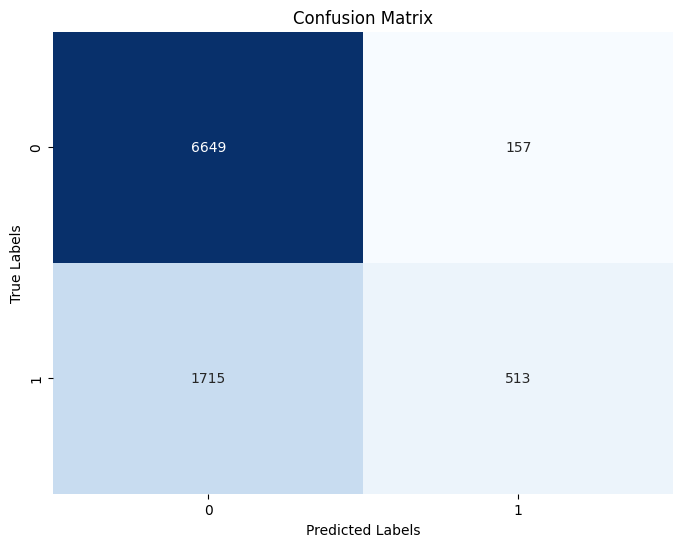

In [12]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()